# SEGUNDA ENTREGA
##Abandono de clientes de telecomunicaciones
>Nombre del Dataset: Dataset-Telco-Customer-Churn.csv



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive') 
%cd '/content/gdrive/MyDrive/ProyectoDataScience/'
df_churn= pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1JBjZRPlZTm-Ax9WZx4quXsWlJqPbkKqm/ProyectoDataScience


Dataset Original (Sin transformaciones)



In [ ]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_churn.drop("customerID", axis=1, inplace=True) #Eliminar columna del Id de cliente que no es relevante a estudio 

#Tasa de abandono de clientes
Se seleccionó un grafico de tarta, ya que solo hay 2 clases y se representa más claramente la magnitud de cada uno.
>Se evidenció que casi 1/4 de los clientes ha abandonado de contrato. 

([<matplotlib.patches.Wedge at 0x7feeaed692b0>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

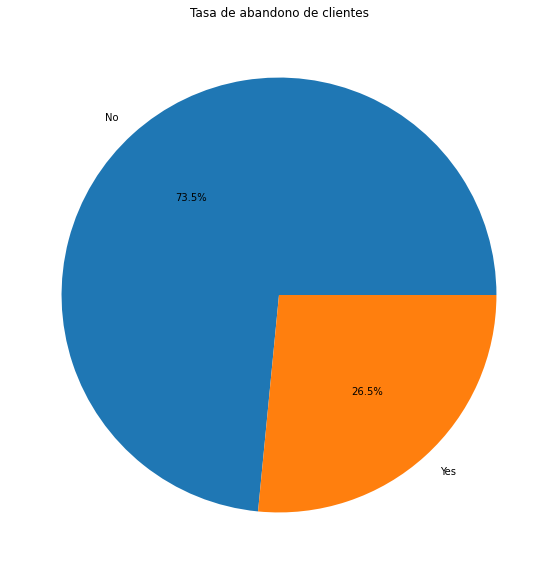

In [ ]:
sizes = df_churn['Churn'].value_counts(sort = True)
labels = np.unique(df_churn.Churn)

plt.figure(figsize = (10,10))
plt.title("Tasa de abandono de clientes")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')


#Distribución de la permanencia

> Según la informacion la mayoría de los clientes que abandonaron estuvieron  en la empresa menos de 20 meses, a medida que aumenta la permanencia la probabilidad de abandonar disminuye.

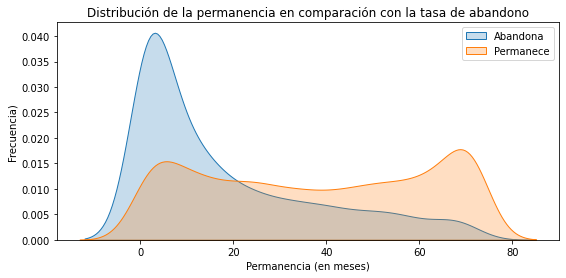

In [ ]:
plt.figure(figsize = (9,4))
g = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == "Yes") ], shade = True)
g = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == "No") ], shade= True)
g.set_xlabel("Permanencia (en meses)")
g.set_ylabel("Frecuencia)")
plt.title('Distribución de la permanencia en comparación con la tasa de abandono')
g = g.legend(["Abandona","Permanece"])

#Visualización de Genero

In [1]:
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(df_churn["gender"])

NameError: ignored

#Comportamiento general de las variables
> Usado par una exploración rapida de los datos

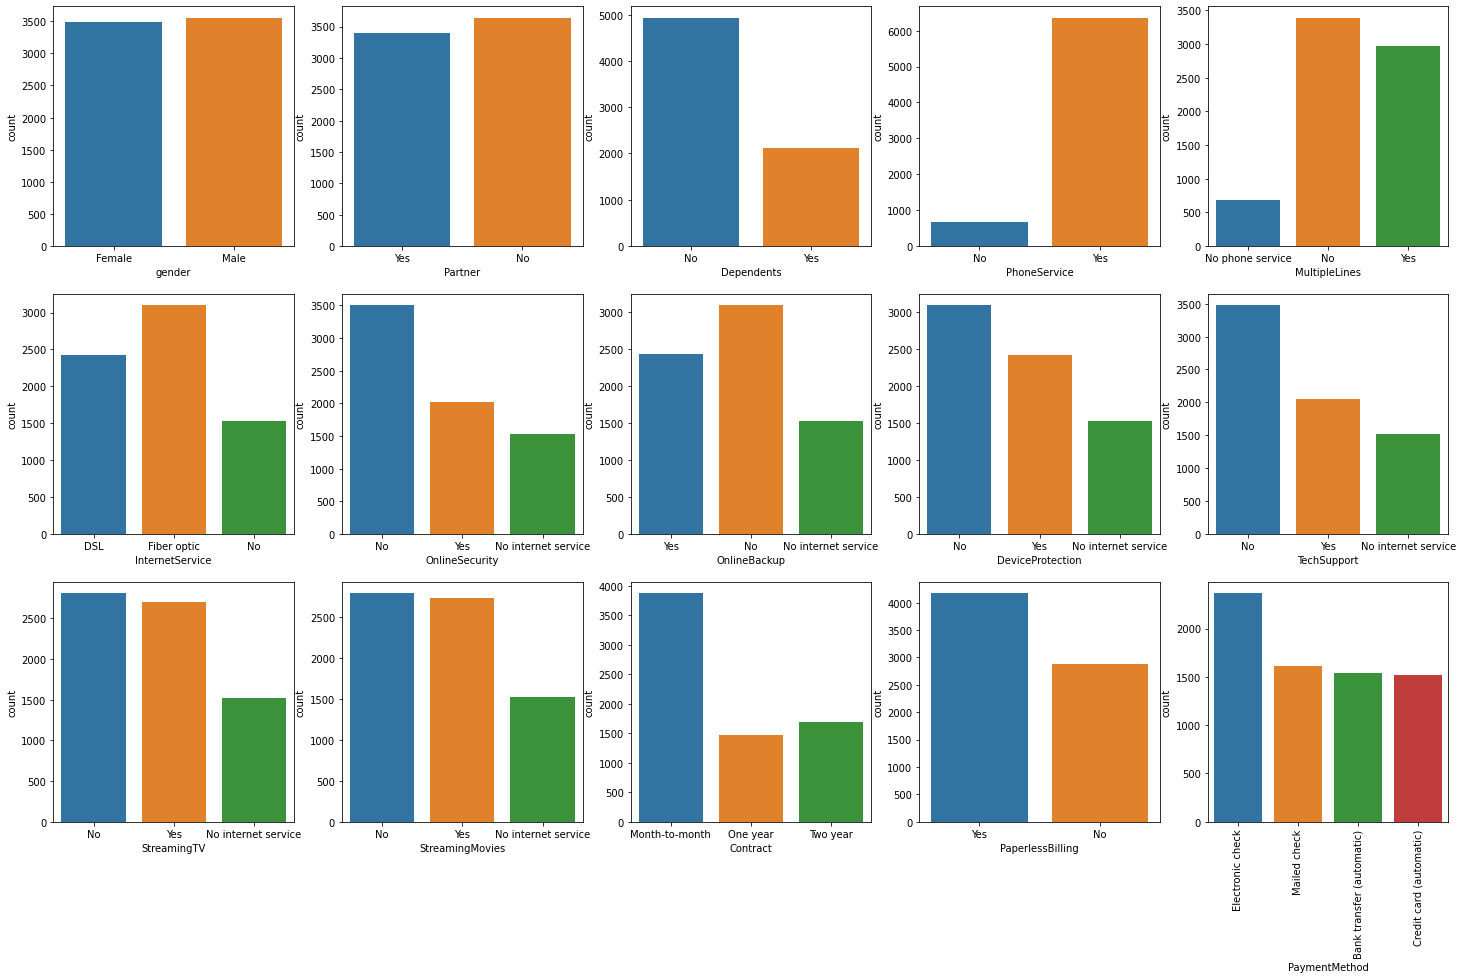

In [ ]:
fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", data = df_churn, ax=axes[0][0])
sns.countplot(x = "Partner", data = df_churn, ax=axes[0][1])
sns.countplot(x = "Dependents", data = df_churn, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df_churn, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = df_churn, ax=axes[0][4])
sns.countplot(x = "InternetService", data = df_churn, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df_churn, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df_churn, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df_churn, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = df_churn, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = df_churn, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df_churn, ax=axes[2][1])
sns.countplot(x = "Contract", data = df_churn, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = df_churn, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = df_churn, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

#Relación de Genero y Seniority
> Hay en su mayoria mujeres 

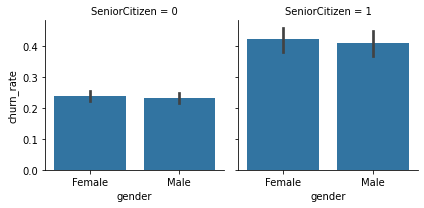

In [ ]:
df_churn['churn_rate'] = df_churn['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df_churn, col="SeniorCitizen")
ax = g.map(sns.barplot, "gender", "churn_rate", order= ['Female', 'Male'])

#CASTEO DE LOS DATOS
> Cambio de los tipos de datos y valores booleanos

In [ ]:
df_churn.gender = [1 if x == "Male" else 0 for x in df_churn.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    df_churn[col] = [1 if x == "Yes" else 0 for x in df_churn[col]]        
df_churn.head(10)  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_rate
0,0,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.5,0,0
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,1,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,...,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,...,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,0
7,0,0,0,0,10,0,0,DSL,1,0,...,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,...,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1
9,1,0,0,1,62,1,0,DSL,1,1,...,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,0


#Generación de Pairplot
> Relación entre las variables

In [ ]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn.TotalCharges, errors='coerce')
df_churn['Churn'] = pd.to_numeric(df_churn.Churn, errors='coerce')
df_churn['MonthlyCharges'] = pd.to_numeric(df_churn.MonthlyCharges, errors='coerce')
df_churn['tenure'] = pd.to_numeric(df_churn.tenure, errors='coerce')

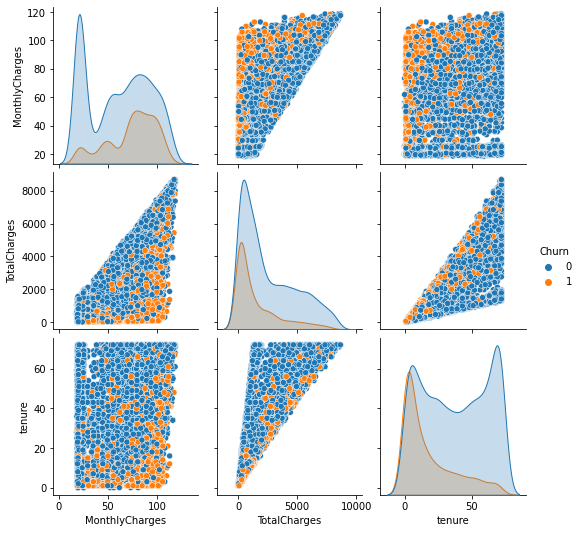

In [ ]:
highCorrCols = ['MonthlyCharges','TotalCharges','tenure', 'Churn']
sns.pairplot(df_churn[highCorrCols], hue = 'Churn')

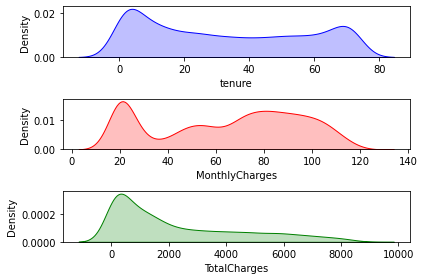

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
sns.kdeplot(df_churn["tenure"], shade=True, color="b",ax = ax1)
sns.kdeplot(df_churn["MonthlyCharges"], shade=True, color="r", ax = ax2)
sns.kdeplot(df_churn["TotalCharges"], shade=True, color="g", ax = ax3)
fig.tight_layout()
plt.show(fig)

#Relación entre medios de pago y abadono


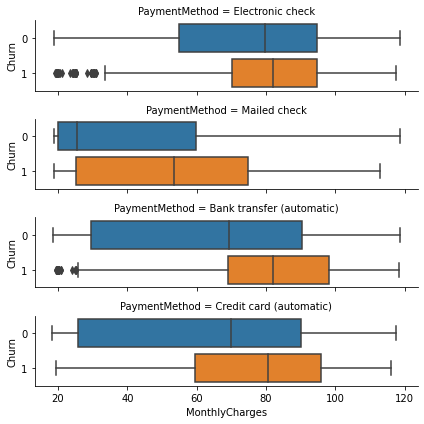

In [ ]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df_churn, height=1.5, aspect=4, orient='h')

#Analisis de correlación de las variables
> Para mostrar cuales variables inciden positiva o negativamente sobre la viariable objetivo 

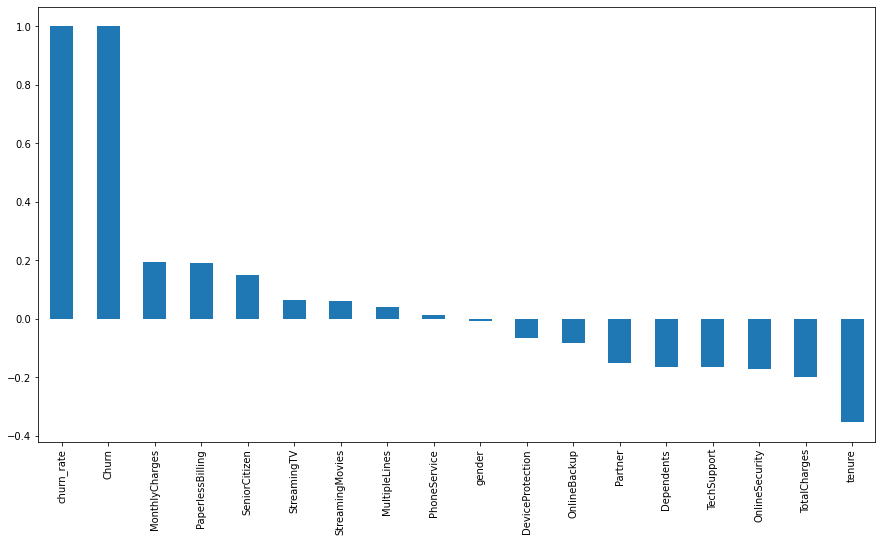

In [ ]:
plt.figure(figsize=(15,8))
df_churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')